<a href="https://colab.research.google.com/github/jmdelvecchio/ears33/blob/main/Climate_and_silicate_weathering.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

### INVESTIGATING ENVIRONMENTAL EFFECTS ON INTENSITY OF SILICATE WEATHERING 

By: Chantal Elias 

*Introduction to Data Tutorial *

In their paper, ["A global temperature control of silicate weathering,"](https://www.nature.com/articles/s41467-022-29415-0#Sec6) Deng et al. investigate the varying effects of environmental factors on the silicate weathering cycle. To measure the intensity of weathering of Feldspar (a common silicate mineral,) Deng et al. used two weathering proxies. The first weathering proxy is the Chemical Index of Alteration (CIA) which increases as weathering increases. The second weathering proxy is the Weathering Index of Parker (WIP) which decreases as weathering increases.  

Objectives of this data tutorial: Understand the chemical processes involved in silicate weathering and to understand the relative effects of temperature and snow/ice cover on the intensity of silicate weathering. 


You will need to download the following [file](https://drive.google.com/file/d/1xtXwasugvoqZLUnDMJ7W0nQURzLPdrsj/view?usp=sharing) to your computer before proceeeding 



Import the libraries you'll need for this data tutorial 

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

Bring in the data! 

In [ ]:
from google.colab import files

uploaded = files.upload()

for fn in uploaded.keys():
  print('User uploaded file "{name}" with length {length} bytes'.format(
      name=fn, length=len(uploaded[fn])))

Saving Supplementary #1 .csv to Supplementary #1 .csv
User uploaded file "Supplementary #1 .csv" with length 398297 bytes


Load the Deng et al.Supplementary #1.csv file as a pandas data frame. I've already cleaned it up to make it easiest to use on this platform. 

In [ ]:
df = pd.read_csv("Supplementary #1 .csv", encoding= 'unicode_escape')
df


,ï»¿Sample number,Sample name,River,Continent,Longitude,Latitude,Sediment description,Al2O3,CaO,K2O,MgO,Na2O,P2O5,CIA,WIP
0,1,2018LST-04,Mokhotlong,Africa,28.990,-29.290,Bedload (clay),16.4,2.8,0.5,5.2,0.3,0.2,91.2,22.1
1,2,2018LST-25,Sani pass,Africa,29.240,-29.550,Bedload (clay),17.4,2.0,0.8,3.2,0.3,0.5,91.1,18.4
2,3,2018LST-27,Senqu,Africa,28.710,-29.600,Bedload (clay),14.9,3.5,0.6,6.9,0.5,0.2,87.0,29.5
3,4,AN1C,Orange,Africa,NaN,NaN,SPM,13.1,2.8,1.3,2.5,1.3,0.1,70.2,32.5
4,5,CLDN,Orange,Africa,NaN,NaN,SPM,16.3,1.0,2.2,1.6,0.5,0.1,80.0,29.1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3823,3824,ORI 08,Orinoco,South America,-63.536,8.154,SPM,11.0,0.5,1.2,0.5,0.3,0.2,83.7,14.6
3824,3825,ORI 09,Orinoco,South America,-63.536,8.154,SPM,13.0,0.6,1.3,0.7,0.3,0.2,84.4,16.4
3825,3826,ORI 10,Orinoco,South America,-63.536,8.154,SPM,9.5,0.3,1.1,0.4,0.2,0.1,83.1,13.5
3826,3827,ORI 11,Orinoco,South America,-63.536,8.154,SPM,15.5,0.5,1.8,0.8,0.3,0.2,84.0,21.3


# **PART ONE: Weathering Indices 
We will begin this data tutorial by understanding the components that make up the CIA and WIP silicate weathering indexes. 

Equations: 

CIA is calculated as the molar ratio of immobile metal oxide to mobile metal oxides. It can be calculated using the equation below: 


>  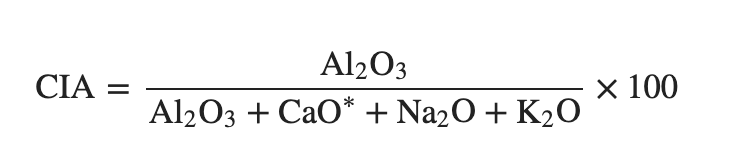

WIP is calculated as the molar proportion of mobile elements and weighted by the bond strength of each element with oxygen as a measure of susceptibility to weathering. It can be calculated using the equation below: 


> 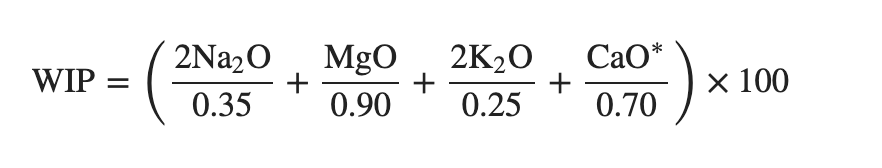



















Let's explore how CIA changes when we shift around its composition of immobile and mobile metal oxides. Knowing that CIA represents the proportion of immobile Al2O3 versus labile oxides (CaO, Na2O, and K2O,) which of these molecules would we expect to be in greatest abundance in a high CIA value? And what molecules would we expect to be in greatest abundance in a low CIA value? 

**YOUR ANSWER HERE**

First, we need to convert the relevant columns to numerical data. 

In [ ]:
df.Latitude.dtypes
df = df.fillna(0)
df
df['Latitude'] = df['Latitude'].astype('int')
df['Longitude'] = df['Longitude'].astype('int')
df['Al2O3'] = df['Al2O3'].astype('int')
df['CaO'] = df['CaO'].astype('int')
df['K2O'] = df['K2O'].astype('int')
df['Na2O'] = df['Na2O'].astype('int')
df['CIA'] = df['CIA'].astype('int')
df['WIP'] = df['WIP'].astype('int')
df.dtypes

ï»¿Sample number          int64
Sample name              object
River                    object
Continent                object
Longitude                 int64
Latitude                  int64
Sediment description     object
Al2O3                     int64
CaO                       int64
K2O                       int64
MgO                      object
Na2O                      int64
P2O5                    float64
CIA                       int64
WIP                       int64
dtype: object

As a reminder, CIA values increase as weathering increases, but WIP decreases as weathering increases. As we have learned in class, increased temperature and precipitation corresponds to a higher intensity of weathering. In their paper, Deng.et al construct a graph (Fig.2) showing that CIA values are highest in the tropics and decrease with latitude. 

Fig.2 from Deng et al. 
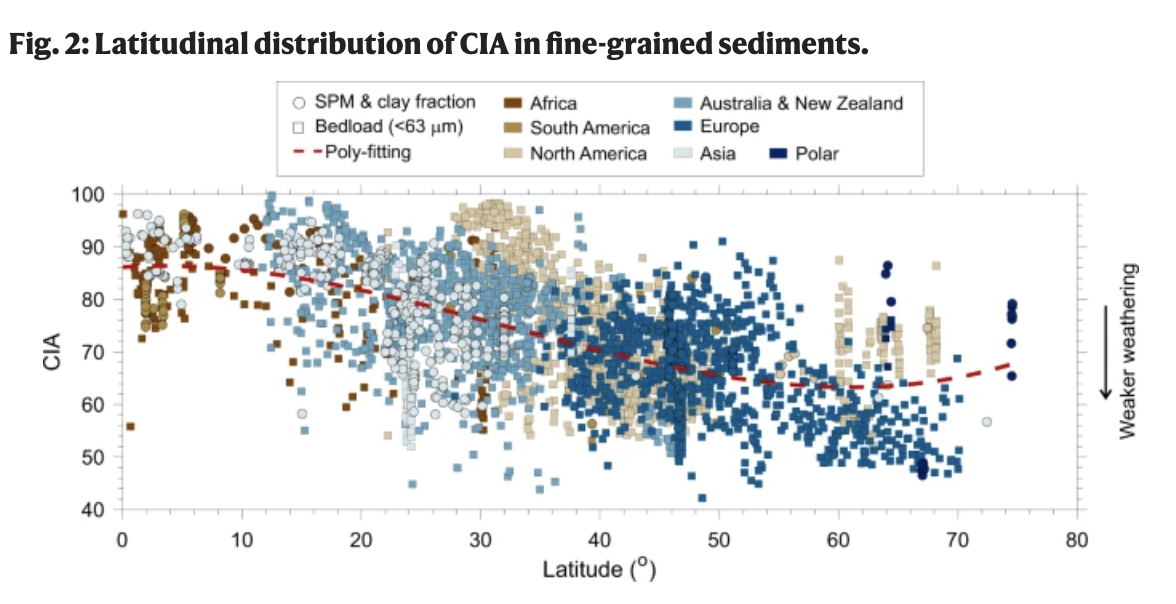



Let's check out how WIP varies with latitude! We will construct a scatterplot to illustrate how WIP and CIA varies with latitude. I've started the process for you below. 

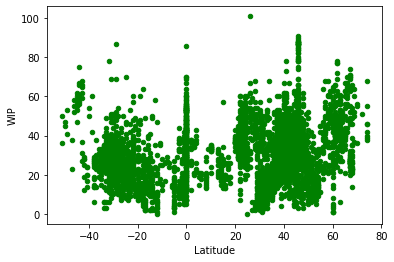

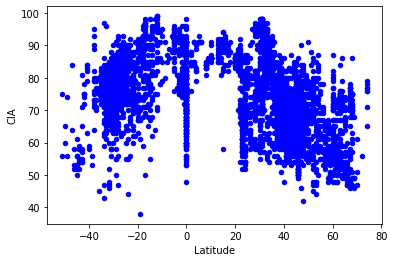

In [ ]:
df.plot.scatter(x = 'Latitude', y = 'WIP', c= 'green')
df.plot.scatter(x = 'Latitude', y = 'CIA', c= 'blue')
plt.show()

What relationship does CIA and WIP have with latitude? How do CIA and WIP compare? 

**Your Answer Here**

If Deng.et al are correct, we would expect to see high CIA values clustered around 0-20 latitude and lower CIA values to be at the higher latitudes. We see this in the above scatter plot. Conversely, WIP is lowest in the low latitudes (around the tropics,) and increases as latitude increases. In that respect, WIP and CIA have completely opposite trends. 

## PART TWO: Weathering and climate 

In their results, Deng.et al find that Mean Annual Temperature (MAT) has the strongest and most consistent correlation with weathering around the globe. That is, as temperature increases, so too will the intensity of weathering. 

The authors of the paper also find that, although weathering decreases with latitude, snow and ice cover have a slightly negative correlation with weathering intensity. 

I am interested in seeing how their weathering indices relate to Greenland climate proxies that I have worked with for the past few years as part of Erich Osterberg's Ice Core Research team. 

A little about the data: We are going to be sea ice concentration data that is pulled from a climate reanalzyer (https://climatereanalyzer.org/reanalysis/monthly_tseries/) In my recent research, I have found that sea ice cover in Baffin Bay is much greater than sea ice cover over the North Atlantic. See below for a graph showing this and also to see what regions I am talking about. 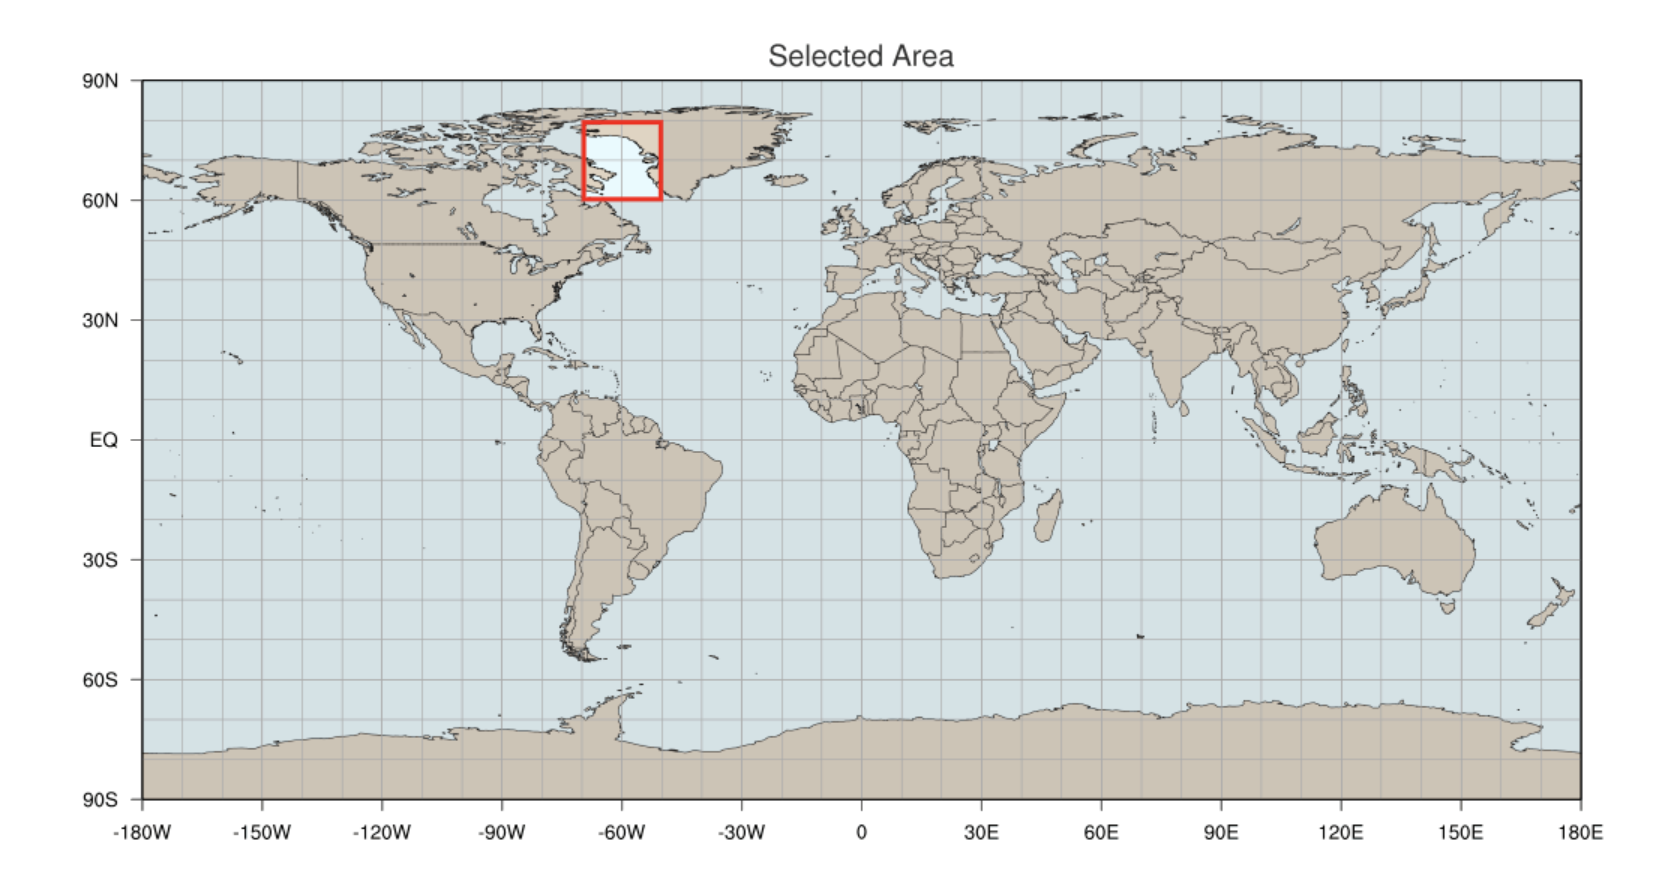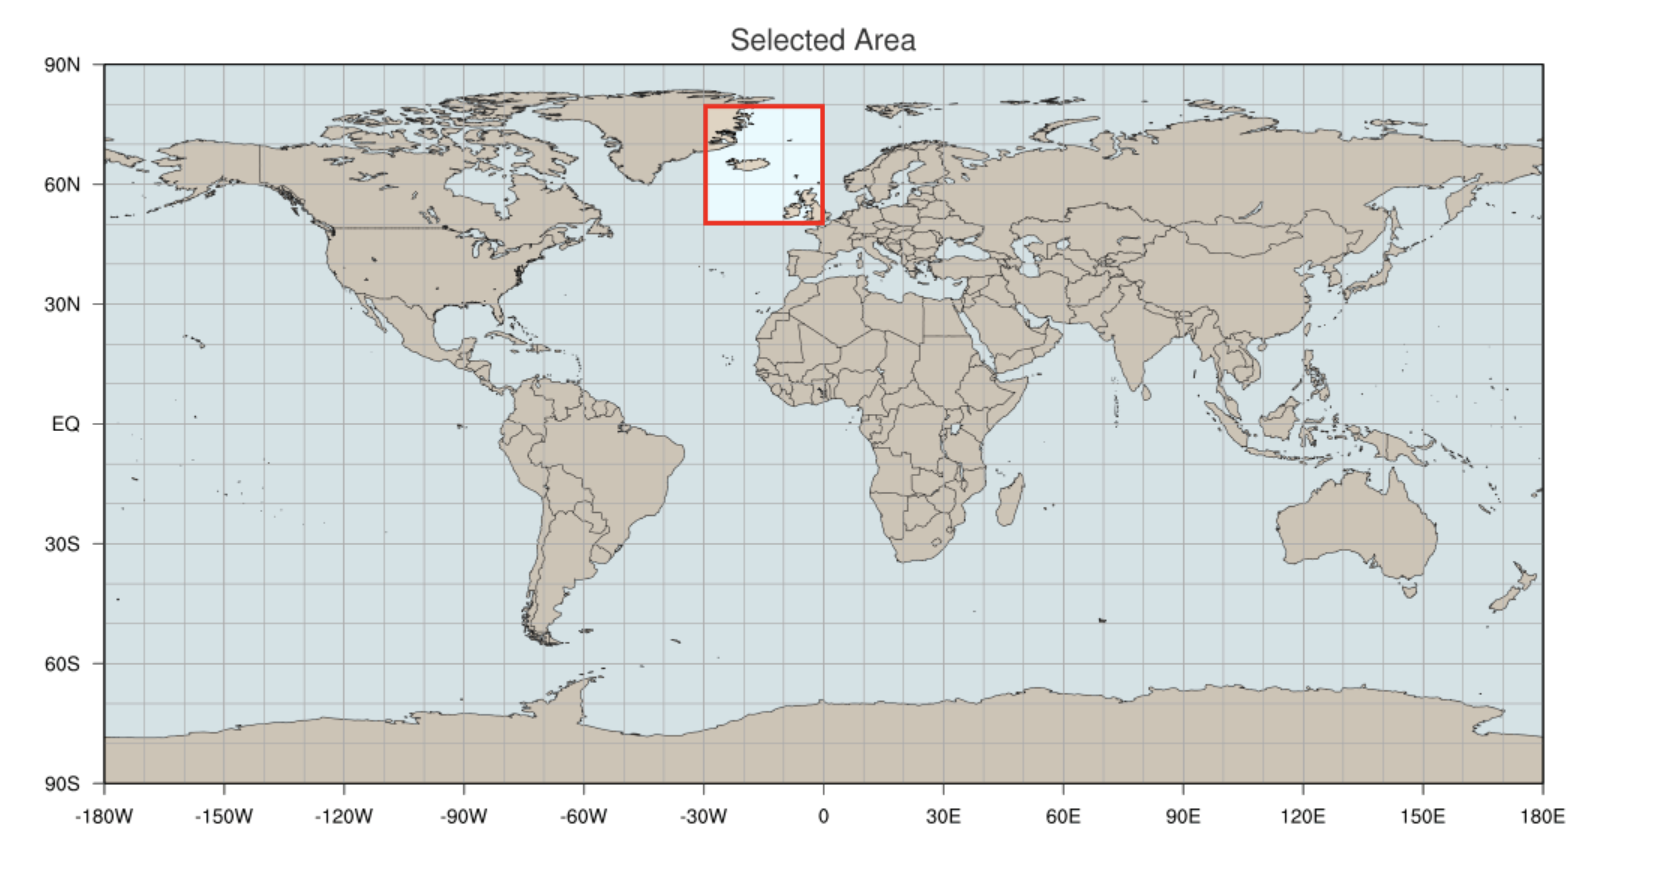

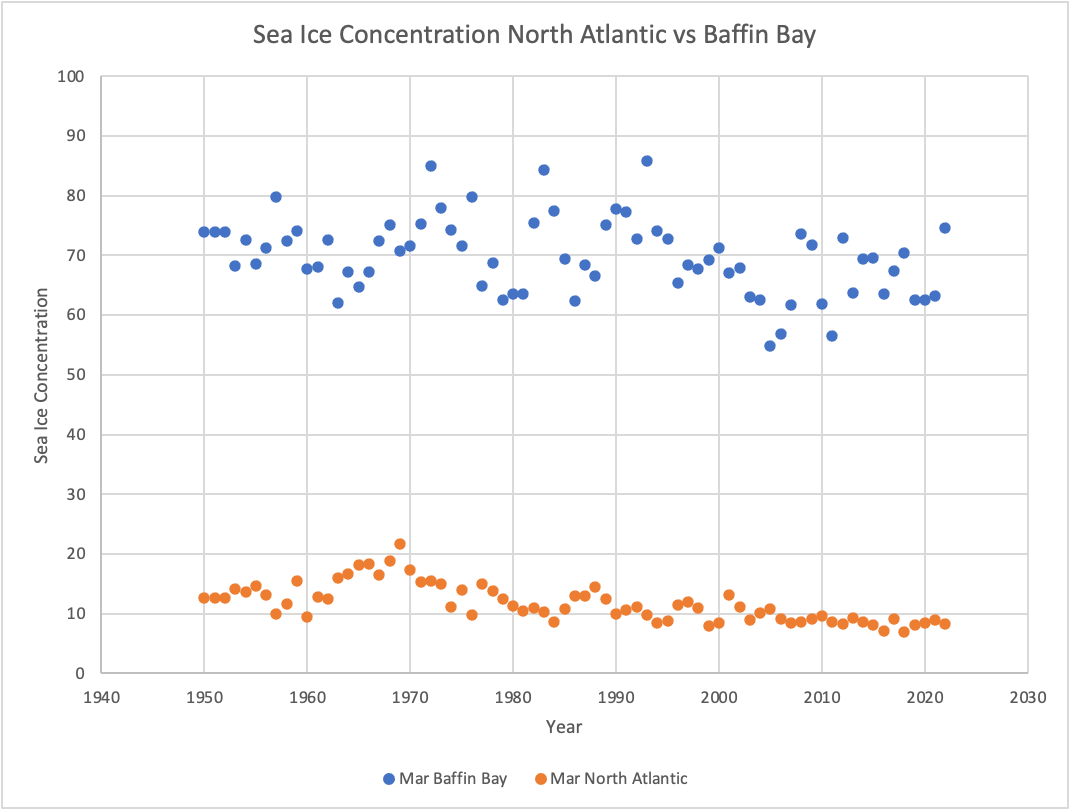


I've constructed a dataframe that includes the following: 

1) Baffin Bay sea ice extent data recorded every march from 2000 to 2022, so there are 23 data points. 

2) North Atlantic sea ice extent data recorded every march from 2000 to 2022, so ethere are 23 data points. 

3) Mean annual temperature data recorded by Deng et al. at select river sites around the world. I tried to include a representative sample 

In [ ]:
#create DataFrame
df_seaicemat = pd.DataFrame({'baffin': ['71.17', '66.9', '67.8', '63', '62.5', '54.7', '56.8', '61.7', '73.6', '71.7', '61.3', '56.5', '72.9', '63.6', '69.4', '69.5', '63.4', '67.4', '70.3', '62.6', '62.5', '63', '74.5'],
                   'atlantic': ['8.3', '13.1', '11', '9', '10', '10.7', '9.07', '8.3', '8.67', '9.15', '9.556', '8.581', '8.247', '9.233', '8.673', '8.043', '7.12', '9.169', '6.905', '8.152', '8.47', '8.914', '8.315'],
                  'river group': ['Aar Massif rivers', 'Akanyaru', 'Alaska rivers', 'Australia rivers', 'Base','Cagayan','Central California rivers','Clutha', 'Dura', 'Europe rivers', 'Greenland rivers', 'Haast','Jiaojiang', 'Kagera', 'Nkusi', 'Oujiang','Peinan', 'Rajang', 'Red', 'Sava', 'Silvretta Massif rivers', 'US rivers', 'Zackenberg'], 'temperature': ['-3.5','16.45', '0.7', '19.8', '17.9', '23.8','16.4', '7.25', '20.5', '7.1', '-5.5', '6.5','15.3', '19.45', '21.85','15.5', '16.25', '24.9', '20.95', '8.4', '-4.2', '11.2', '-11.72']})
df_seaicemat

,baffin,atlantic,river group,temperature
0,71.17,8.3,Aar Massif rivers,-3.5
1,66.9,13.1,Akanyaru,16.45
2,67.8,11,Alaska rivers,0.7
3,63,9,Australia rivers,19.8
4,62.5,10,Base,17.9
5,54.7,10.7,Cagayan,23.8
6,56.8,9.07,Central California rivers,16.4
7,61.7,8.3,Clutha,7.25
8,73.6,8.67,Dura,20.5
9,71.7,9.15,Europe rivers,7.1


Now, let's convert the baffin bay, north atlantic, and mean annual temperature data from objects to a float to construct our scatterplot. 

In [ ]:
df_seaicemat.dtypes
df_seaicemat['baffin']=df_seaicemat['baffin'].astype(float)
df_seaicemat['atlantic']=df_seaicemat['atlantic'].astype(float)
df_seaicemat['temperature']=df_seaicemat['temperature'].astype(float)
df_seaicemat.dtypes

baffin         float64
atlantic       float64
river group     object
temperature    float64
dtype: object

Lets construct a scatterplot between baffin bay sea ice extent and mean annual temperature and compare that to a scatterplot between north atlantic sea ice extent and mean annual temperature. 

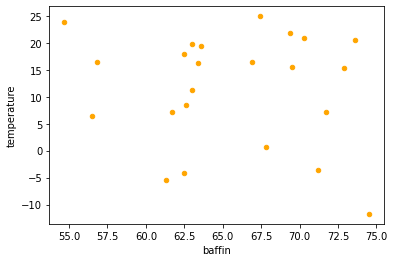

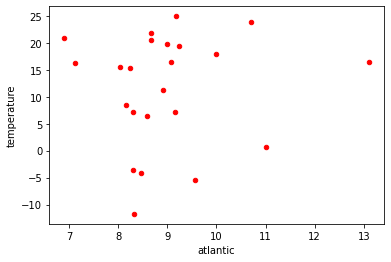

In [ ]:
df_seaicemat.plot.scatter(x= 'baffin', y= 'temperature', c= 'orange')
df_seaicemat.plot.scatter(x= 'atlantic', y= 'temperature', c= 'red')
plt.show()

Comparing the two scatterplots, what differences do you observe? 

**Your answer here**

Baffin bay sea ice extent is evidently greater than sea ice extent in the North Atlantic. 

The Greenland river mean annual temperature should, in theory, have a very strong correlation with the sea ice extent of the north atlantic and baffin bay. I am interested in seeing if mean annual temperature of the greenland rivers correlates better with baffin bay or the north atlantic sea ice extent. 

Use the below dataframe for the r squared calculation, which only includes the greenland rivers and averaged sea ice data from the north atlantic and baffin bay. 

In [ ]:
df_greenlandrivers = pd.DataFrame({'baffin_seaice': ['72.86', '69', '62.7', '56.5', '63.4'], 'atlantic_seaice': ['8.34', '11', '13', '9.07', '12.04'], 'greenlandtemp' : ['-5.5', '-6.4', '-5.9', '-7.5', '-6']})
df_greenlandrivers   

,baffin_seaice,atlantic_seaice,greenlandtemp
0,72.86,8.34,-5.5
1,69,11,-6.4
2,62.7,13,-5.9
3,56.5,9.07,-7.5
4,63.4,12.04,-6


In [ ]:
df_greenlandrivers.dtypes 
df_greenlandrivers['baffin_seaice']=df_greenlandrivers['baffin_seaice'].astype(float)
df_greenlandrivers['atlantic_seaice']=df_greenlandrivers['atlantic_seaice'].astype(float) 
df_greenlandrivers['greenlandtemp']=df_greenlandrivers['greenlandtemp'].astype(float) 
df_greenlandrivers.dtypes 

baffin_seaice      float64
atlantic_seaice    float64
greenlandtemp      float64
dtype: object


Below, calculate the correlation between baffin sea ice and greenland river MAT. 

In [ ]:
from sklearn.linear_model import LinearRegression
model = LinearRegression()
X, y = df_greenlandrivers[["baffin_seaice", "greenlandtemp"]], df_greenlandrivers
model.fit(X,y)
r_squared = model.score(X, y)
print(r_squared)

0.8107467324153962


Now, calculate the correlation between north atlantic sea ice and greenland river MAT. 

In [ ]:
from sklearn.linear_model import LinearRegression
model = LinearRegression()
X, y = df_greenlandrivers[["atlantic_seaice", "greenlandtemp"]], df_greenlandrivers
model.fit(X,y)
r_squared = model.score(X, y)
print(r_squared)

0.917762320298238


How do the two r squared values compare? 

**Your answer here **

The r squared values are quite similiar, indicating that there is not great variation in the strength of the relationship between mean annual temperature and the two different bodies of water. However, there is a slightly stronger r squared value between the north atlantic and greenland temperature than between baffin bay and greenland temperature. 

As a reminder, Deng.et al found that temperature is the ultimate driver for weathering intensity but found that snow and ice cover cause weathering to decrease. Let us take a look at the CIA data to see if that holds up with their results and my data. If they are correct,we would expect CIA values recorded at the rivers closest to the north atlantic to be lower than CIA values recorded at the rivers closest to baffin bay (which has a greater extent of sea ice.) 

Lucky for us, Figure 2 of the Deng paper shows CIA values for a river on the east coast of greenland and a river on the west coast of greenland. My climate research shows that the east coast will be more greatly influenced by the north atlantic and the west coast of greenland will be more greatly influenced by baffin bay. 

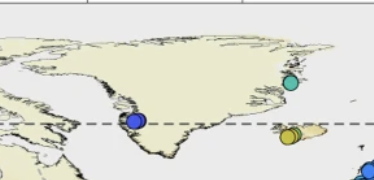

Blue represents a low CIA value while yellow represents a high CIA value and green represents a middle to high CIA value. 

Does this figure support our hypotheses and Deng's hypotheses or contradict them? 

*YOUR ANSWER HERE*

As you can see, the site on the west coast of greenland has a very low CIA value and the site on the east coast of greenland has a very high CIA value. This tells us that the Deng hypotheses hold up with my own research: areas with high snow and ice coverage will have less weathering (in this case, baffin bay) compared to those that have lower snow and ice coverage (in this case, the north atlantic.) 

I hope you enjoyed learning about silicate weathering and its interaction with greenland ice and temperature! Before you end, please answer the below reflection question in about 4 sentences. 

**Reflection question:** **During the last glacial maximum there was ice at extremely low latitudes (even around the tropics!) Given what you've learned in this data tutorial, what would you expect to measure in terms of the intensity of silicate weathering happening at the tropics? How would that compare to silicate weathering at the tropics recorded in present day?**

 *I would expect the intensity of silicate weathering at the tropics during the last glacial maximum to be extremely low. Using the Deng et al. paper's weathering index, I would expect CIA values to be very low. This is because, during the last glacial maximum, there was both very low temperatures and there would have been ice and snow cover over the tropics. We know that temperature is the main driver of silicate weathering but that snow/ice cover can also reduce weathering. Cooler temperatures + snow/ice cover would result in very little silicate weathering. Today, the tropics have intense precipitation and intense heat and thus one would expect that silicate weathering rates would be very high (as Deng et al found.) Thus, we can say that there would be a huge difference in the silicate weathering intensity near the equator when comparing today to the last glacial maximum.*